In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
# !rm -rf sample_data
# !rm -rf segmented
# !rm -rf segmented_224
# !rm -rf random.png random_data.png

In [ ]:
# !unzip '/content/drive/MyDrive/Colab Notebooks/Final_Year_Project/combined_segmented.zip'
# !unzip '/content/drive/MyDrive/Colab Notebooks/Final_Year_Project/png.zip'
# !unzip '/content/drive/MyDrive/Colab Notebooks/Final_Year_Project/bw_segmented.zip'

In [4]:
# import os

# root_dir = os.listdir()
# # os.rename('combined_segmented', 'segmented')
# # os.rename('png', 'segmented')
# os.rename('bw_segmented', 'segmented')

In [1]:
# Loading the data and generating labels
import numpy as np
import os
from imageio import imread
from keras.applications.vgg16 import preprocess_input
from keras.utils import to_categorical 
from skimage.transform import resize
import glob
import cv2
import random

IMG_SIZE = 32
no_of_classes = 55
image_height, image_width = IMG_SIZE, IMG_SIZE
no_of_color_channels = 3
root_dir = os.getcwd()
print(root_dir)

total_no_of_images = len(list(glob.glob(root_dir+"/segmented/[0-9]*/"+"/*.png", recursive=True)))
print(total_no_of_images)

count = 0
train_size = total_no_of_images - no_of_classes*3
data = np.empty((train_size, image_height, image_width, no_of_color_channels))
labels = np.empty(train_size, dtype=int)

test_count = 0
test_data = np.empty((no_of_classes*3, image_height, image_width, no_of_color_channels))
test_labels = np.empty(no_of_classes*3, dtype=int)

print(train_size)
print(no_of_classes*3)

r = random.randrange(total_no_of_images)
for i in range(no_of_classes):
    class_dir = root_dir + "/" + "segmented" + "/" + str(i)
    class_images = glob.glob(class_dir+'/*.png')
    size = len(class_images)
    if (i % 10 == 0): print(i)
    else: print(i, end=' ')
    for j in range(size):
        image_path = class_images[j]
        image =imread(image_path)
        # if len(image.shape) > 2 and image.shape[2] == 4:
        #     image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
        # image = resize(image, output_shape=(IMG_SIZE, IMG_SIZE))
        if count == r:
          cv2.imwrite(root_dir+'/random.png',image)
        image = preprocess_input(image)
        # image = resize(image, output_shape=(IMG_SIZE, IMG_SIZE))
        if j < size-3: 
          data[count] = image
        else:
          test_data[test_count] = image
        if count == r:
          cv2.imwrite(root_dir+'/random_data.png',image)
        if j < size-3:
          labels[count] = i
          count+=1
        else:
          test_labels[test_count] = i
          test_count+=1
print('')

c:\Users\kosanam\OneDrive\Desktop\test
58482
58317
165
0


C:\Users\kosanam\AppData\Local\Temp\ipykernel_12708\2057255070.py:43: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image =imread(image_path)


1 2 3 4 5 6 7 8 9 10
11 12 13 14 15 16 17 18 19 20
21 22 23 24 25 26 27 28 29 30
31 32 33 34 35 36 37 38 39 40
41 42 43 44 45 46 47 48 49 50
51 52 53 54 


In [ ]:
# np.save(root_dir+'/data.npy', data)
# np.save(root_dir+'/labels.npy', labels)
# np.save(root_dir+'/test_data.npy', test_data)
# np.save(root_dir+'/test_labels.npy', test_labels)
# # data = np.load(root_dir+'/data.npy')
# # labels = np.load(root_dir+'/labels.npy')

(32, 32, 3)
-123.68000030517578
151.06100463867188
[ 0  0  0 ... 54 54 54]
165 (32, 32, 3)
[ 0  0  0  1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7
  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12 13 13 13 14 14 14 15 15 15
 16 16 16 17 17 17 18 18 18 19 19 19 20 20 20 21 21 21 22 22 22 23 23 23
 24 24 24 25 25 25 26 26 26 27 27 27 28 28 28 29 29 29 30 30 30 31 31 31
 32 32 32 33 33 33 34 34 34 35 35 35 36 36 36 37 37 37 38 38 38 39 39 39
 40 40 40 41 41 41 42 42 42 43 43 43 44 44 44 45 45 45 46 46 46 47 47 47
 48 48 48 49 49 49 50 50 50 51 51 51 52 52 52 53 53 53 54 54 54]


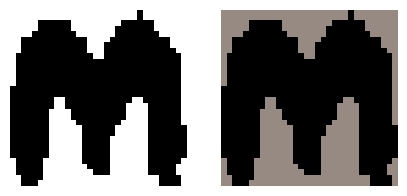

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

print(data[random.randrange(total_no_of_images)].shape)
fig = plt.figure(figsize=(5, 5))
fig.add_subplot(1, 2, 1)
plt.imshow(cv2.imread(root_dir+'/random.png'))
plt.axis('off')
fig.add_subplot(1, 2, 2)
plt.imshow(cv2.imread(root_dir+'/random_data.png'))
plt.axis('off')
print(data.min())
print(data.max())
print(labels)
print(len(test_data), test_data[random.randrange(no_of_classes)].shape)
print(test_labels)

In [3]:
# Importing VGG16
from keras.applications.vgg16 import VGG16

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
base_model = VGG16(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False
# base_model.summary()

58889256/58889256 [==============================] - 7s 0us/step


In [4]:
# # Modifying the model
from keras import Model
from keras.layers import Dense, Flatten, Dropout
from keras import layers, models


# character_output = Dense(no_of_classes, activation='softmax')
# character_output = character_output(base_model.layers[-2].output)
# character_input = base_model.input
# character_model = Model(inputs=character_input, outputs=character_output)
# for layer in character_model.layers[:-1]:
#   layer.trainable = False


flatten_layer = Flatten()
dense_layer_1 = Dense(256, activation='relu')
dropout_layer_1 = Dropout(0.4)
dense_layer_2 = Dense(128, activation='relu')
dropout_layer_2 = Dropout(0.6)
prediction_layer = Dense(55, activation='softmax')

# character_model = models.Sequential([
#     base_model,
#     flatten_layer,
#     dense_layer_1,
#     dense_layer_2,
#     prediction_layer
# ])
# character_model.summary()

# flatten_layer = layers.Flatten()
# dense_layer_1 = layers.Dense(64, activation='relu')
# prediction_layer = layers.Dense(55, activation='softmax')

character_model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dropout_layer_1,
    
    dropout_layer_2,
    dense_layer_2,
    prediction_layer
])
character_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 55)                7

In [35]:
# Compiling the model
from keras.optimizers import Adam
custom_adam = Adam(learning_rate=0.0001)
character_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=custom_adam,
    metrics=['accuracy']
)

In [36]:
# EarlyStopping
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [ ]:
# Training the model
history = character_model.fit(
    x=data,
    y=labels,
    epochs=200,
    verbose='auto',
    validation_split=0.1,
    shuffle=True, 
    callbacks=[es],
    batch_size=32
)

In [ ]:
print(history.history.keys())
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(10)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(history.history.keys())
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(10)
plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
character_model.save('character_model_vgg16.h5')

In [ ]:
predictions = character_model.predict(test_data)
print('Shape: {}'.format(predictions.shape))

In [ ]:
for i in range(no_of_classes):
  output_neuron = np.argmax(predictions[i])
  print('Most active neuron: {} ({:.2f}%)'.format(
      output_neuron,
      100 * predictions[i][output_neuron]
  ))

In [ ]:
top1_correct = 0
top1_incorrect = 0
top5_correct = 0
top5_incorrect = 0
for i in range(no_of_classes*3):
  s = set()
  sorted_predictions = np.sort(predictions[i])[::-1]
  for j in range(5):
    x = list(np.where(predictions[i]==sorted_predictions[j]))[0][0]
    s.add(x)
  # print(list(s))
  if test_labels[i] in s: top5_correct+=1
  else: top5_incorrect+=1
  if test_labels[i] == np.argmax(predictions[i]): top1_correct+=1
  else: top1_incorrect+=1

print('Top-1 Accuracy: ', (top1_correct*100)/(top1_correct+top1_incorrect))
print('Top-5 Accuracy: ', (top5_correct*100)/(top5_correct+top5_incorrect))